# **Lab-8 Decision Trees**

In [300]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=20)
mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=16)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [301]:
import tarfile
import urllib
import pandas as pd
import urllib.request

In [302]:
data = pd.read_csv("https://raw.githubusercontent.com/BenCoke12/DMMLG3/main/Breast_Cancer.csv")

In [303]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(data[["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Estrogen Status", "Progesterone Status", "Status"]])
data[["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Estrogen Status", "Progesterone Status", "Status"]] = enc.transform(data[["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Estrogen Status", "Progesterone Status", "Status"]])

In [304]:
X=data.iloc[:, -1].values
#X=data

In [305]:
X.shape

(4024,)

In [306]:
Y=data.iloc[:,5]
#Y=data['6th Stage']

In [307]:
X = data.drop('6th Stage', axis = 1)

In [308]:
Y

0       0.0
1       2.0
2       4.0
3       0.0
4       1.0
       ... 
4019    0.0
4020    2.0
4021    1.0
4022    1.0
4023    1.0
Name: 6th Stage, Length: 4024, dtype: float64

# **Decision Tree**

In [309]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [310]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, Y)

DecisionTreeClassifier()

In [346]:
%matplotlib inline
mpl.rcParams['figure.figsize'] = (25.0, 15.0)

# **Decision Boundary**

In [347]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X1, y1, axes=[0, 7.5, 0, 3], data=True, legend=False, plot_training=True):
# Set min and max values and give it some padding
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = 0.01
  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Predict the function value for the whole gid
 # Z = tree_clf(np.c_[xx.ravel(), yy.ravel()])
 # Z = Z.reshape(xx.shape)
  y_pred = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
  # Plot the contour and training examples
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
  # Plot the decision boundary
  plot_decision_boundary(tree_clf, X, Y)
  plt.title("Decision tree")
  plt.show()

In [313]:
plt.figure(figsize=(25,15))

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

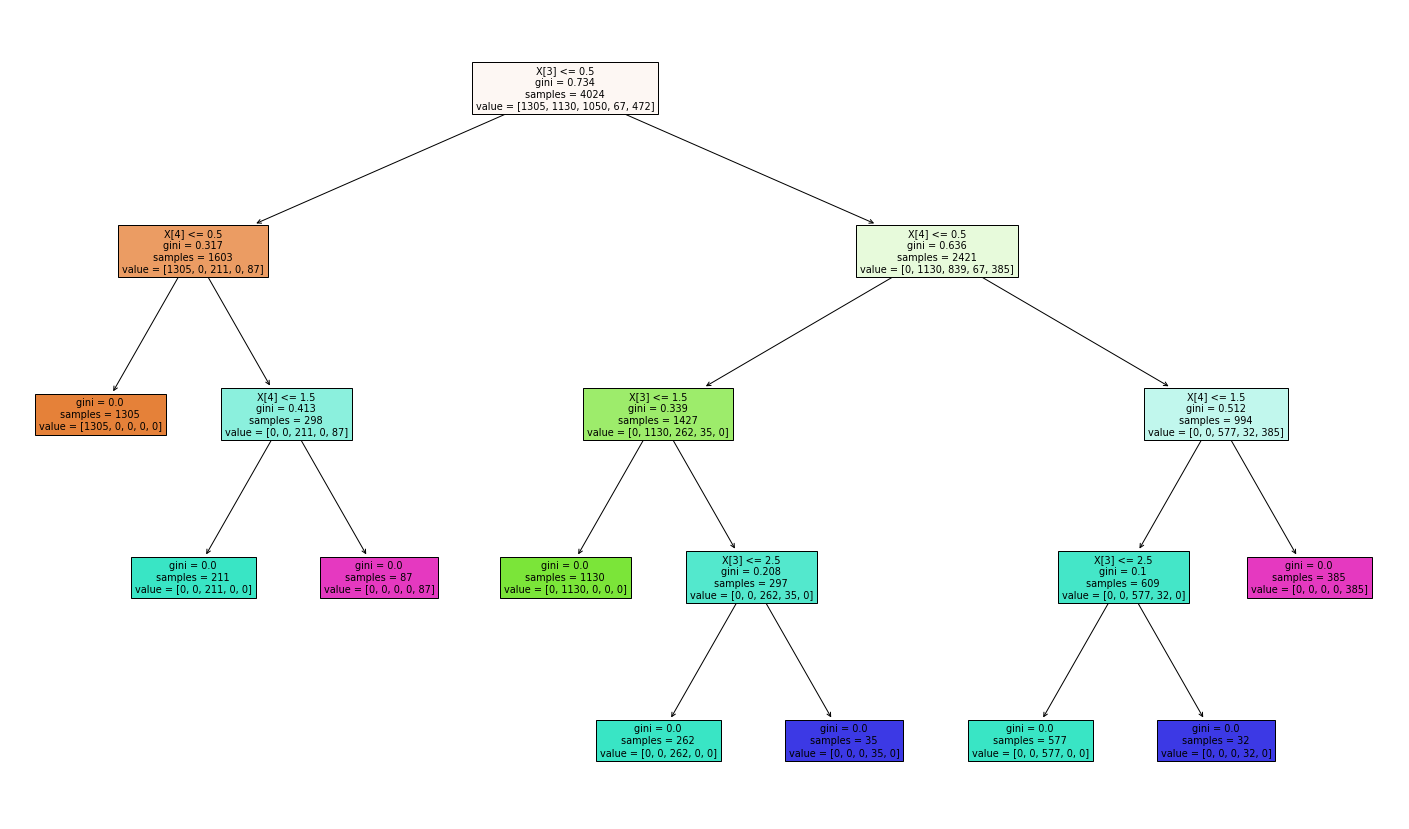

In [348]:
plot_tree(tree_clf,filled=True);

# Predicting classes and class probabilities

In [362]:
tree_clf.predict_proba([X])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

# **Evalauation using metrics**

In [316]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [317]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [318]:
X_train.shape, X_test.shape

((2696, 15), (1328, 15))

In [319]:
X_train = enc.fit_transform(X_train)



# **DecisionTreeClassifier model with criterion gini index**

In [320]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [321]:
y_pred = clf_gini.predict(X_test)
y_pred.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(1328,)

In [322]:
y_pred_gini = clf_gini.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [323]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9895


# **Using Entropy criterion**

In [324]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [325]:
y_pred = clf_en.predict(X_test)
y_pred.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(1328,)

In [326]:
y_pred_en = clf_en.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [327]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9895


In [328]:
print(classification_report(y_test, y_pred_en)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       429
         1.0       1.00      1.00      1.00       366
         2.0       0.96      1.00      0.98       369
         3.0       0.00      0.00      0.00        14
         4.0       1.00      1.00      1.00       150

    accuracy                           0.99      1328
   macro avg       0.79      0.80      0.80      1328
weighted avg       0.98      0.99      0.98      1328



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Compare the train-set and test-set accuracy**

In [329]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([2., 0., 1., ..., 1., 1., 1.])

In [330]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9803


**To check overfitting issues**

In [331]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9803
Test set score: 0.9895


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Visualizing decision tree**

[Text(0.4230769230769231, 0.875, 'X[3] <= 0.5\ngini = 0.736\nsamples = 2696\nvalue = [876, 764, 681, 53, 322]'),
 Text(0.15384615384615385, 0.625, 'X[4] <= 0.5\ngini = 0.326\nsamples = 1085\nvalue = [876, 0, 149, 0, 60]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 876\nvalue = [876, 0, 0, 0, 0]'),
 Text(0.23076923076923078, 0.375, 'X[4] <= 1.5\ngini = 0.409\nsamples = 209\nvalue = [0, 0, 149, 0, 60]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 149\nvalue = [0, 0, 149, 0, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 60\nvalue = [0, 0, 0, 0, 60]'),
 Text(0.6923076923076923, 0.625, 'X[4] <= 0.5\ngini = 0.639\nsamples = 1611\nvalue = [0, 764, 532, 53, 262]'),
 Text(0.5384615384615384, 0.375, 'X[3] <= 1.5\ngini = 0.338\nsamples = 962\nvalue = [0, 764, 169, 29, 0]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.0\nsamples = 764\nvalue = [0, 764, 0, 0, 0]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.25\nsamples = 198\nvalue = [0, 0, 169, 29, 0]')

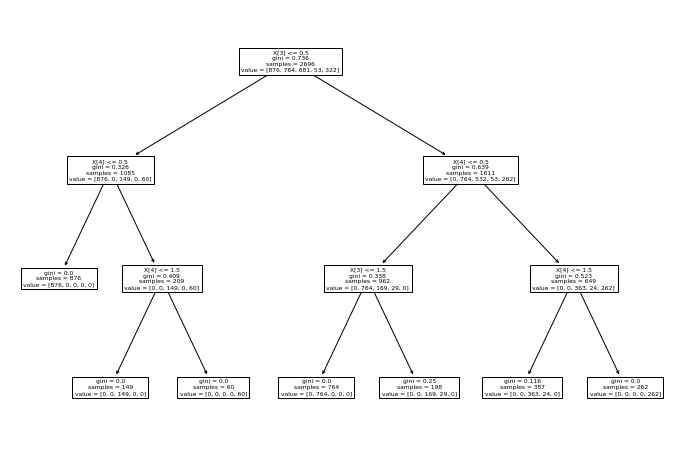

In [332]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [333]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[429   0   0   0   0]
 [  0 366   0   0   0]
 [  0   0 369   0   0]
 [  0   0  14   0   0]
 [  0   0   0   0 150]]


In [334]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       429
         1.0       1.00      1.00      1.00       366
         2.0       0.96      1.00      0.98       369
         3.0       0.00      0.00      0.00        14
         4.0       1.00      1.00      1.00       150

    accuracy                           0.99      1328
   macro avg       0.79      0.80      0.80      1328
weighted avg       0.98      0.99      0.98      1328



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Adding hyperparameters**

In [350]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0,min_samples_leaf=4,max_features=10)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=10, min_samples_leaf=4,
                       random_state=0)

In [351]:
y_pred_gini_hyp = clf_gini.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [352]:
#print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini_hyp)))

In [353]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_pred_gini_hyp,y_test))

Accuracy: 0.8064759036144579


# **GridSearchCV using Moons dataset**

In [363]:
from sklearn.model_selection import GridSearchCV

In [364]:
from sklearn.datasets import make_moons#A simple toy dataset to visualize clustering and classification algorithms
dataset=make_moons(n_samples=10000, shuffle=True, noise=0.4, random_state=42)

In [369]:
X1,y1=dataset

In [370]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

In [371]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

In [372]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

In [373]:
grid_search_cv.fit(X1_train, y1_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [375]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [377]:
#print accuracy score

y1_pred = grid_search_cv.predict(X1_test)


In [378]:
accuracy_score(y1_test, y1_pred)

0.8695

In [381]:
# print classification report 
print(classification_report(y1_test, y1_pred) )

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1013
           1       0.88      0.86      0.87       987

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



# **GridSearchCV using Breast Cancer dataset**

In [382]:
X2=data

In [383]:
X2 = data.drop('6th Stage', axis = 1)

In [385]:
y2=data.iloc[:,5]
#Y=data['6th Stage']

In [387]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [388]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

In [389]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

In [390]:
grid_search_cv.fit(X2_train, y2_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [391]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=9, random_state=42)

In [392]:
#print accuracy score

y2_pred = grid_search_cv.predict(X2_test)


In [393]:
accuracy_score(y2_test, y2_pred)

1.0

In [394]:
# print classification report 
print(classification_report(y2_test, y2_pred) )

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       275
         1.0       1.00      1.00      1.00       222
         2.0       1.00      1.00      1.00       220
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00        83

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805

